In [1]:
import os
import sys
AeroBDSM_OOP_dir = os.path.abspath(os.path.join('../..'))
if AeroBDSM_OOP_dir not in sys.path:
    sys.path.append(AeroBDSM_OOP_dir)

from isolated_plane import *
from libs.Atmosphere import atmo
from math import *
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, read_excel

%config InlineBackend.figure_format = 'svg'

In [2]:
plt.rcParams["font.family"] = 'serif'
plt.rcParams['font.weight'] = 'ultralight'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
plt.rcParams['font.style'] = 'normal'
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['mathtext.fontset'] = 'stix'

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Неповоротная НП

# Параметры крыла
l_kr = 0.248            # размах крыла [м]
l_c = 0.124             # длина одной консоли [м]
b_b = 0.340             # бортовая хорда [м]
b_1 = 0.200             # концевая хорда [м]
chi_0 = radians(48.47)  # угол стреловидности по передней кромке [рад]
chi_1 = radians(0)      # угол стреловидности по задней кромке [рад]

# Параметры руля
S_r = 0.0669            # площадь рулей
lambd_r = 0.9185        # удлинение рулей
xx_r = 0.5              # относительная координата оси вращения рулей

# Параметры профиля крыла
cc_b = 0.048            # относительная толщина профиля бортовой хорды [-]
cc_1 = 0.078            # относительная толщина профиля концевой хорды [-]
cc = (cc_b + cc_1) / 2  # средняя относительная толщина профиля [-]
xx_c = 0.5              # относительная координата положения максимальной толщины [-]
hb = 1e-5               # относительная высота бугорков профиля [-]
rr_0 = 0                # относительный радиус скругления передней кромки [-]
aa = 0.5                # отношение геометрического параметра профиля `a` в долях рассматриваемой хорды [-]

xx_0 = 0                # относительная координата центра вращения в долях САХ (от носка САХ) относительно которой считаются моменты
xx_t = None             # относительная координата перехода пограничного слоя из ламинарного в турбулентный в долях рассматриваемой хорды
T_s = None              # средняя температура поверхности крыла, К

H = 0                   # высота полёта
delta = -10 / 57.3      # угол поворота рулей
omega_z = 0             # угловая скорость

In [4]:
# Расчет геометрических параметров

S_kr = (b_b + b_1) / 2 * l_kr
lambda_kr = l_kr ** 2 / S_kr
zeta_kr = b_1 / b_b
chi_05 = atan(tan(chi_0) - 2 / lambda_kr * (1 / zeta_kr - 1) / (1 / zeta_kr + 1))

In [5]:
Airfoil = HexProfile(b_b, cc, xx_c, aa, rr_0, hb)
IP = IsolatedPlane(S_kr, lambda_kr, zeta_kr, chi_05, Airfoil)
RotConsoles = IsolatedPlane_RotatingConsoles(S_kr, lambda_kr, zeta_kr, chi_05, S_r, lambd_r, xx_r, Airfoil)

In [6]:
M06 = 0.6
M11 = 1.1
M15 = 1.5
M2 = 2

In [7]:
cy_M06_StatConsoles = []
cy_M11_StatConsoles = []
cy_M15_StatConsoles = []
cy_M2_StatConsoles = []

cx_M06_StatConsoles = []
cx_M11_StatConsoles = []
cx_M15_StatConsoles = []
cx_M2_StatConsoles = []

cya_M06_StatConsoles = []
cya_M11_StatConsoles = []
cya_M15_StatConsoles = []
cya_M2_StatConsoles = []

cxa_M06_StatConsoles = []
cxa_M11_StatConsoles = []
cxa_M15_StatConsoles = []
cxa_M2_StatConsoles = []

mz_M06_StatConsoles = []
mz_M11_StatConsoles = []
mz_M15_StatConsoles = []
mz_M2_StatConsoles = []

xd_M06_StatConsoles = []
xd_M11_StatConsoles = []
xd_M15_StatConsoles = []
xd_M2_StatConsoles = []

z_dc_M2_StatConsoles = []

alpha_wing = np.linspace(-20, 20, 201)

for alf in alpha_wing:
    c_y = IP.c_y(M06, np.deg2rad(alf))
    c_ya = IP.c_ya(M06, np.deg2rad(alf), H, xx_t, T_s)
    c_x = IP.c_x(M06, np.deg2rad(alf), H, xx_t, T_s)
    c_xa = IP.c_xa(M06, np.deg2rad(alf), H, xx_t, T_s)
    mz = IP.m_z(M06, np.deg2rad(alf), xx_0)
    xd = IP.x_d(M06, np.deg2rad(alf))
    cy_M06_StatConsoles.append(c_y)
    cya_M06_StatConsoles.append(c_ya)
    cx_M06_StatConsoles.append(c_x)
    cxa_M06_StatConsoles.append(c_xa)
    mz_M06_StatConsoles.append(mz)
    xd_M06_StatConsoles.append(xd)
    
for alf in alpha_wing:
    c_y = IP.c_y(M11, np.deg2rad(alf))
    c_ya = IP.c_ya(M11, np.deg2rad(alf), H, xx_t, T_s)
    c_x = IP.c_x(M11, np.deg2rad(alf), H, xx_t, T_s)
    c_xa = IP.c_xa(M11, np.deg2rad(alf), H, xx_t, T_s)
    mz = IP.m_z(M11, np.deg2rad(alf), xx_0)
    xd = IP.x_d(M11, np.deg2rad(alf))
    cy_M11_StatConsoles.append(c_y)
    cya_M11_StatConsoles.append(c_ya)
    cx_M11_StatConsoles.append(c_x)
    cxa_M11_StatConsoles.append(c_xa)
    mz_M11_StatConsoles.append(mz)
    xd_M11_StatConsoles.append(xd)

for alf in alpha_wing:
    c_y = IP.c_y(M15, np.deg2rad(alf))
    c_ya = IP.c_ya(M15, np.deg2rad(alf), H, xx_t, T_s)
    c_x = IP.c_x(M15, np.deg2rad(alf), H, xx_t, T_s)
    c_xa = IP.c_xa(M15, np.deg2rad(alf), H, xx_t, T_s)
    mz = IP.m_z(M15, np.deg2rad(alf), xx_0)
    xd = IP.x_d(M15, np.deg2rad(alf))
    cy_M15_StatConsoles.append(c_y)
    cya_M15_StatConsoles.append(c_ya)
    cx_M15_StatConsoles.append(c_x)
    cxa_M15_StatConsoles.append(c_xa)
    mz_M15_StatConsoles.append(mz)
    xd_M15_StatConsoles.append(xd)

for alf in alpha_wing:
    c_y = IP.c_y(M2, np.deg2rad(alf))
    c_ya = IP.c_ya(M2, np.deg2rad(alf), H, xx_t, T_s)
    c_x = IP.c_x(M2, np.deg2rad(alf), H, xx_t, T_s)
    c_xa = IP.c_xa(M2, np.deg2rad(alf), H, xx_t, T_s)
    mz = IP.m_z(M2, np.deg2rad(alf), xx_0)
    xd = IP.x_d(M2, np.deg2rad(alf))
    z_dc = IP.z_dc(M2, np.deg2rad(alf))
    cy_M2_StatConsoles.append(c_y)
    cya_M2_StatConsoles.append(c_ya)
    cx_M2_StatConsoles.append(c_x)
    cxa_M2_StatConsoles.append(c_xa)
    mz_M2_StatConsoles.append(mz)
    xd_M2_StatConsoles.append(xd)
    z_dc_M2_StatConsoles.append(z_dc)

In [8]:
cy_M06_RotConsoles = []
cy_M11_RotConsoles = []
cy_M15_RotConsoles = []
cy_M2_RotConsoles = []

cx_M06_RotConsoles = []
cx_M11_RotConsoles = []
cx_M15_RotConsoles = []
cx_M2_RotConsoles = []

cya_M06_RotConsoles = []
cya_M11_RotConsoles = []
cya_M15_RotConsoles = []
cya_M2_RotConsoles = []

cxa_M06_RotConsoles = []
cxa_M11_RotConsoles = []
cxa_M15_RotConsoles = []
cxa_M2_RotConsoles = []

mz_M06_RotConsoles = []
mz_M11_RotConsoles = []
mz_M15_RotConsoles = []
mz_M2_RotConsoles = []

xd_M06_RotConsoles = []
xd_M11_RotConsoles = []
xd_M15_RotConsoles = []
xd_M2_RotConsoles = []

z_dc_M2_RotConsoles = []

for alf in alpha_wing:
    c_y = RotConsoles.c_y(M06, np.deg2rad(alf), delta, H, xx_t, T_s)
    c_ya = RotConsoles.c_ya(M06, np.deg2rad(alf), delta, H, xx_t, T_s)
    c_x = RotConsoles.c_x(M06, np.deg2rad(alf), delta, H, xx_t, T_s)
    c_xa = RotConsoles.c_xa(M06, np.deg2rad(alf), delta, H, xx_t, T_s)       
    mz = RotConsoles.m_z(M06, np.deg2rad(alf), delta, xx_0, omega_z, H, xx_t, T_s)
    xd = RotConsoles.x_d(M06, np.deg2rad(alf), delta, H, xx_t, T_s)
    cy_M06_RotConsoles.append(c_y)
    cya_M06_RotConsoles.append(c_ya)
    cx_M06_RotConsoles.append(c_x)
    cxa_M06_RotConsoles.append(c_xa)
    mz_M06_RotConsoles.append(mz)
    xd_M06_RotConsoles.append(xd)
    
for alf in alpha_wing:
    c_y = RotConsoles.c_y(M11, np.deg2rad(alf), delta, H, xx_t, T_s)
    c_ya = RotConsoles.c_ya(M11, np.deg2rad(alf), delta, H, xx_t, T_s)
    c_x = RotConsoles.c_x(M11, np.deg2rad(alf), delta, H, xx_t, T_s)
    c_xa = RotConsoles.c_xa(M11, np.deg2rad(alf), delta, H, xx_t, T_s)
    mz = RotConsoles.m_z(M11, np.deg2rad(alf), delta, xx_0, omega_z, H, xx_t, T_s)
    xd = RotConsoles.x_d(M11, np.deg2rad(alf), delta, H, xx_t, T_s)
    cy_M11_RotConsoles.append(c_y)
    cya_M11_RotConsoles.append(c_ya)
    cx_M11_RotConsoles.append(c_x)
    cxa_M11_RotConsoles.append(c_xa)
    mz_M11_RotConsoles.append(mz)
    xd_M11_RotConsoles.append(xd)

for alf in alpha_wing:
    c_y = RotConsoles.c_y(M15, np.deg2rad(alf), delta, H, xx_t, T_s)
    c_ya = RotConsoles.c_ya(M15, np.deg2rad(alf), delta, H, xx_t, T_s)
    c_x = RotConsoles.c_x(M15, np.deg2rad(alf), delta, H, xx_t, T_s)
    c_xa = RotConsoles.c_xa(M15, np.deg2rad(alf), delta, H, xx_t, T_s)
    mz = RotConsoles.m_z(M15, np.deg2rad(alf), delta, xx_0, omega_z, H, xx_t, T_s)
    xd = RotConsoles.x_d(M15, np.deg2rad(alf), delta, H, xx_t, T_s)
    cy_M15_RotConsoles.append(c_y)
    cya_M15_RotConsoles.append(c_ya)
    cx_M15_RotConsoles.append(c_x)
    cxa_M15_RotConsoles.append(c_xa)
    mz_M15_RotConsoles.append(mz)
    xd_M15_RotConsoles.append(xd)

for alf in alpha_wing:
    c_y = RotConsoles.c_y(M2, np.deg2rad(alf), delta, H, xx_t, T_s)
    c_ya = RotConsoles.c_ya(M2, np.deg2rad(alf), delta, H, xx_t, T_s)
    c_x = RotConsoles.c_x(M2, np.deg2rad(alf), delta, H, xx_t, T_s)
    c_xa = RotConsoles.c_xa(M2, np.deg2rad(alf), delta, H, xx_t, T_s)
    mz = RotConsoles.m_z(M2, np.deg2rad(alf), delta, xx_0, omega_z, H, xx_t, T_s)
    xd = RotConsoles.x_d(M2, np.deg2rad(alf), delta, H, xx_t, T_s)
    z_dc = RotConsoles.z_dc(M2, np.deg2rad(alf), delta)
    cy_M2_RotConsoles.append(c_y)
    cya_M2_RotConsoles.append(c_ya)
    cx_M2_RotConsoles.append(c_x)
    cxa_M2_RotConsoles.append(c_xa)
    mz_M2_RotConsoles.append(mz)
    xd_M2_RotConsoles.append(xd)
    z_dc_M2_RotConsoles.append(z_dc)

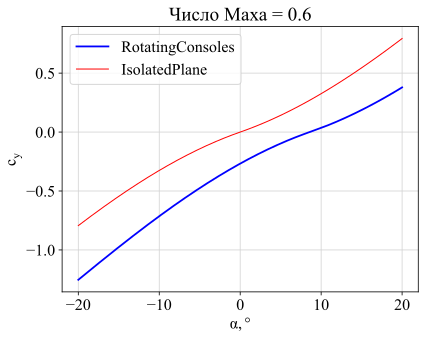

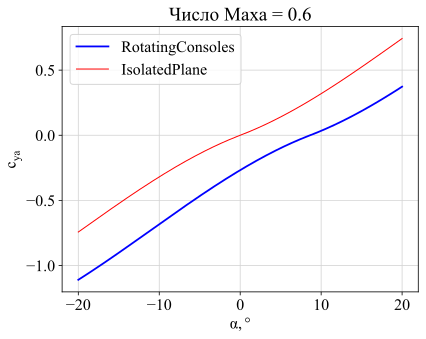

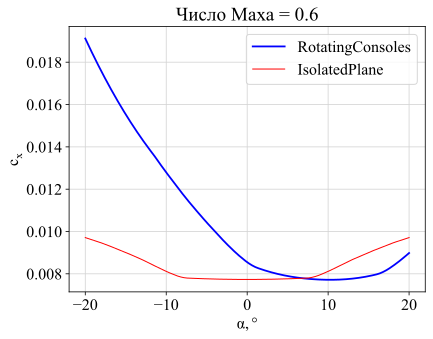

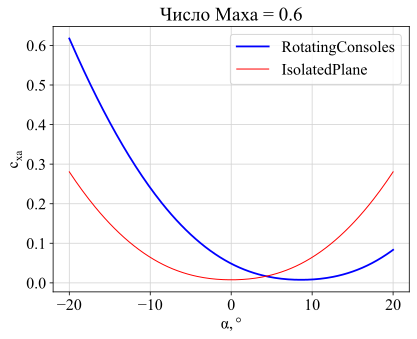

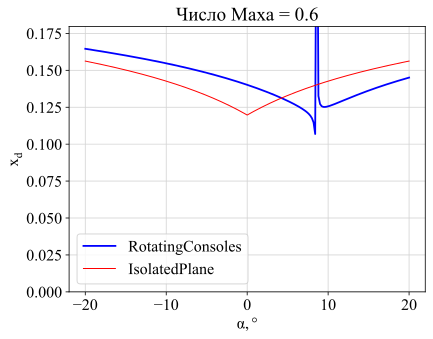

In [9]:
# Нормальная сила
plt.title('Число Маха = 0.6')
plt.plot(alpha_wing, cy_M06_RotConsoles, color = 'blue', lw = 1.8, label = 'RotatingConsoles')
plt.plot(alpha_wing, cy_M06_StatConsoles, color = 'red', lw = 1, label = 'IsolatedPlane')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$c_{y}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
# plt.savefig('plots\M06 c_y.jpeg', facecolor='white')
plt.show()

# Подъемная сила
plt.title('Число Маха = 0.6')
plt.plot(alpha_wing, cya_M06_RotConsoles, color = 'blue', lw = 1.8, label = 'RotatingConsoles')
plt.plot(alpha_wing, cya_M06_StatConsoles, color = 'red', lw = 1, label = 'IsolatedPlane')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$c_{ya}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
# plt.savefig('plots\M06 c_ya.jpeg', facecolor='white')
plt.show()

# Продольная сила
plt.title('Число Маха = 0.6')
plt.plot(alpha_wing, cx_M06_RotConsoles, color = 'blue', lw = 1.8, label = 'RotatingConsoles')
plt.plot(alpha_wing, cx_M06_StatConsoles, color = 'red', lw = 1, label = 'IsolatedPlane')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$c_{x}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
# plt.savefig('plots\M06 c_x.jpeg', facecolor='white')
plt.show()

# Сила лобового сопротивления
plt.title('Число Маха = 0.6')
plt.plot(alpha_wing, cxa_M06_RotConsoles, color = 'blue', lw = 1.8, label = 'RotatingConsoles')
plt.plot(alpha_wing, cxa_M06_StatConsoles, color = 'red', lw = 1, label = 'IsolatedPlane')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$c_{xa}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
# plt.savefig('plots\M06 c_xa.jpeg', facecolor='white')
plt.show()

# Центр давления
plt.title('Число Маха = 0.6')
plt.plot(alpha_wing, xd_M06_RotConsoles, color = 'blue', lw = 1.8, label = 'RotatingConsoles')
plt.plot(alpha_wing, xd_M06_StatConsoles, color = 'red', lw = 1, label = 'IsolatedPlane')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$x_{d}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
plt.ylim(0, np.max(xd_M06_StatConsoles[-1])*1.15)
# plt.savefig('plots\M06 x_d.jpeg', facecolor='white')
plt.show()

# plt.title('Число Маха = 0.6')
# plt.plot(alpha_wing_Ansys, -Y_M06_wing_Ansys*(b_b+(Mz_M06_wing_Ansys / Y_M06_wing_Ansys)), color = 'blue', lw = 1.8, label = 'Ansys')
# plt.plot(alpha_wing, mz_M06_StatConsoles, color = 'red', lw = 1.8, label = 'ЛиЧ')
# plt.xlabel('$\\alpha, \degree$')
# plt.ylabel('$m_{z}$')
# plt.legend(loc = 'best')
# plt.grid(color = 'lightgray')
# plt.show()

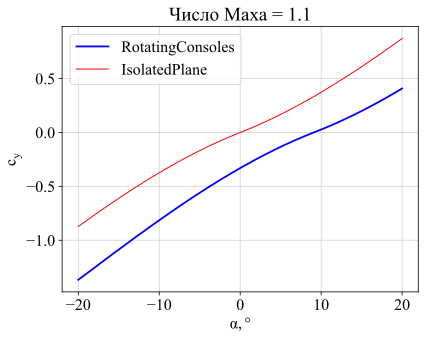

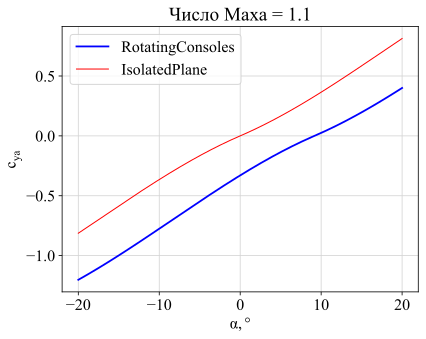

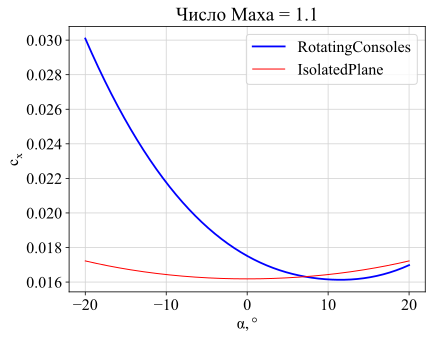

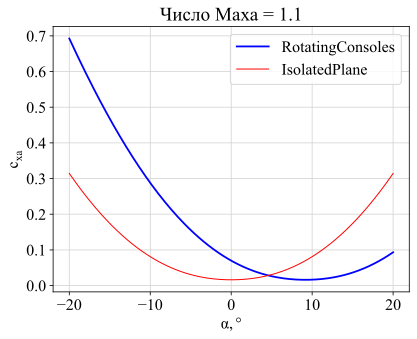

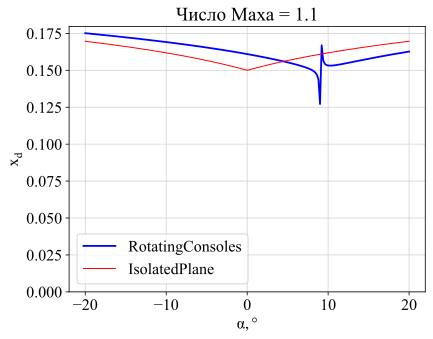

In [10]:
# Нормальная сила
plt.title('Число Маха = 1.1')
plt.plot(alpha_wing, cy_M11_RotConsoles, color = 'blue', lw = 1.8, label = 'RotatingConsoles')
plt.plot(alpha_wing, cy_M11_StatConsoles, color = 'red', lw = 1, label = 'IsolatedPlane')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$c_{y}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
# plt.savefig('plots\M06 c_y.jpeg', facecolor='white')
plt.show()

# Подъемная сила
plt.title('Число Маха = 1.1')
plt.plot(alpha_wing, cya_M11_RotConsoles, color = 'blue', lw = 1.8, label = 'RotatingConsoles')
plt.plot(alpha_wing, cya_M11_StatConsoles, color = 'red', lw = 1, label = 'IsolatedPlane')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$c_{ya}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
# plt.savefig('plots\M06 c_ya.jpeg', facecolor='white')
plt.show()

# Продольная сила
plt.title('Число Маха = 1.1')
plt.plot(alpha_wing, cx_M11_RotConsoles, color = 'blue', lw = 1.8, label = 'RotatingConsoles')
plt.plot(alpha_wing, cx_M11_StatConsoles, color = 'red', lw = 1, label = 'IsolatedPlane')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$c_{x}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
# plt.savefig('plots\M06 c_x.jpeg', facecolor='white')
plt.show()

# Сила лобового сопротивления
plt.title('Число Маха = 1.1')
plt.plot(alpha_wing, cxa_M11_RotConsoles, color = 'blue', lw = 1.8, label = 'RotatingConsoles')
plt.plot(alpha_wing, cxa_M11_StatConsoles, color = 'red', lw = 1, label = 'IsolatedPlane')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$c_{xa}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
# plt.savefig('plots\M06 c_xa.jpeg', facecolor='white')
plt.show()

# Центр давления
plt.title('Число Маха = 1.1')
plt.plot(alpha_wing, xd_M11_RotConsoles, color = 'blue', lw = 1.8, label = 'RotatingConsoles')
plt.plot(alpha_wing, xd_M11_StatConsoles, color = 'red', lw = 1, label = 'IsolatedPlane')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$x_{d}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
plt.ylim(0, np.max(xd_M06_StatConsoles[-1])*1.15)
# plt.savefig('plots\M06 x_d.jpeg', facecolor='white')
plt.show()

# plt.title('Число Маха = 0.6')
# plt.plot(alpha_wing_Ansys, -Y_M06_wing_Ansys*(b_b+(Mz_M06_wing_Ansys / Y_M06_wing_Ansys)), color = 'blue', lw = 1.8, label = 'Ansys')
# plt.plot(alpha_wing, mz_M06_StatConsoles, color = 'red', lw = 1.8, label = 'ЛиЧ')
# plt.xlabel('$\\alpha, \degree$')
# plt.ylabel('$m_{z}$')
# plt.legend(loc = 'best')
# plt.grid(color = 'lightgray')
# plt.show()

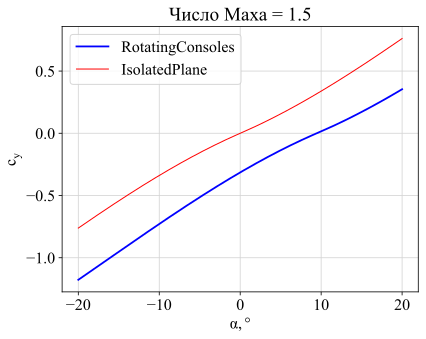

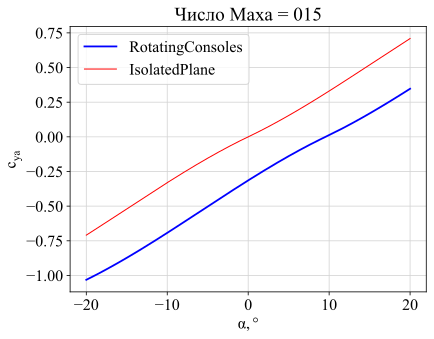

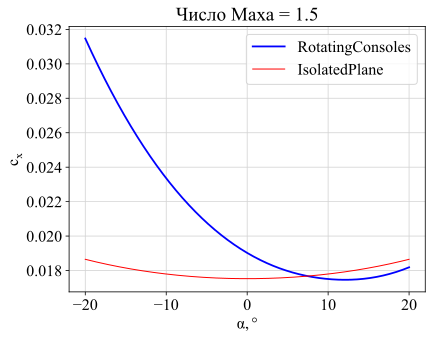

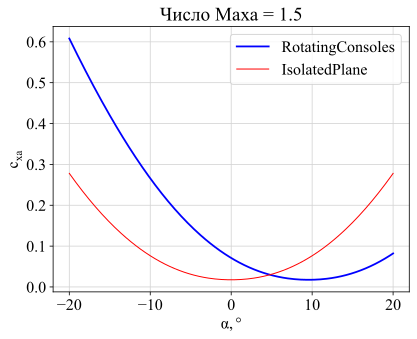

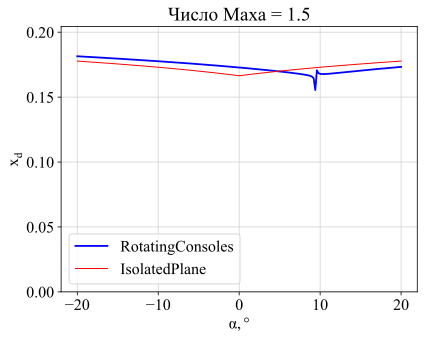

In [11]:
# Нормальная сила
plt.title('Число Маха = 1.5')
plt.plot(alpha_wing, cy_M15_RotConsoles, color = 'blue', lw = 1.8, label = 'RotatingConsoles')
plt.plot(alpha_wing, cy_M15_StatConsoles, color = 'red', lw = 1, label = 'IsolatedPlane')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$c_{y}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
# plt.savefig('plots\M06 c_y.jpeg', facecolor='white')
plt.show()

# Подъемная сила
plt.title('Число Маха = 015')
plt.plot(alpha_wing, cya_M15_RotConsoles, color = 'blue', lw = 1.8, label = 'RotatingConsoles')
plt.plot(alpha_wing, cya_M15_StatConsoles, color = 'red', lw = 1, label = 'IsolatedPlane')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$c_{ya}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
# plt.savefig('plots\M06 c_ya.jpeg', facecolor='white')
plt.show()

# Продольная сила
plt.title('Число Маха = 1.5')
plt.plot(alpha_wing, cx_M15_RotConsoles, color = 'blue', lw = 1.8, label = 'RotatingConsoles')
plt.plot(alpha_wing, cx_M15_StatConsoles, color = 'red', lw = 1, label = 'IsolatedPlane')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$c_{x}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
# plt.savefig('plots\M06 c_x.jpeg', facecolor='white')
plt.show()

# Сила лобового сопротивления
plt.title('Число Маха = 1.5')
plt.plot(alpha_wing, cxa_M15_RotConsoles, color = 'blue', lw = 1.8, label = 'RotatingConsoles')
plt.plot(alpha_wing, cxa_M15_StatConsoles, color = 'red', lw = 1, label = 'IsolatedPlane')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$c_{xa}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
# plt.savefig('plots\M06 c_xa.jpeg', facecolor='white')
plt.show()

# Центр давления
plt.title('Число Маха = 1.5')
plt.plot(alpha_wing, xd_M15_RotConsoles, color = 'blue', lw = 1.8, label = 'RotatingConsoles')
plt.plot(alpha_wing, xd_M15_StatConsoles, color = 'red', lw = 1, label = 'IsolatedPlane')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$x_{d}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
plt.ylim(0, np.max(xd_M15_StatConsoles[-1])*1.15)
# plt.savefig('plots\M06 x_d.jpeg', facecolor='white')
plt.show()

# plt.title('Число Маха = 0.6')
# plt.plot(alpha_wing_Ansys, -Y_M06_wing_Ansys*(b_b+(Mz_M06_wing_Ansys / Y_M06_wing_Ansys)), color = 'blue', lw = 1.8, label = 'Ansys')
# plt.plot(alpha_wing, mz_M06_StatConsoles, color = 'red', lw = 1.8, label = 'ЛиЧ')
# plt.xlabel('$\\alpha, \degree$')
# plt.ylabel('$m_{z}$')
# plt.legend(loc = 'best')
# plt.grid(color = 'lightgray')
# plt.show()

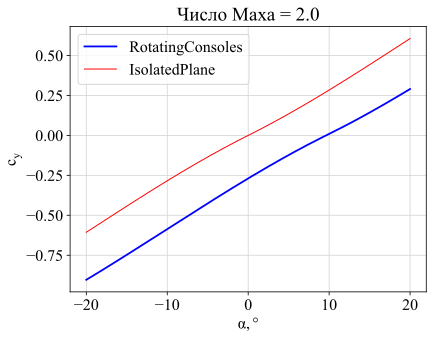

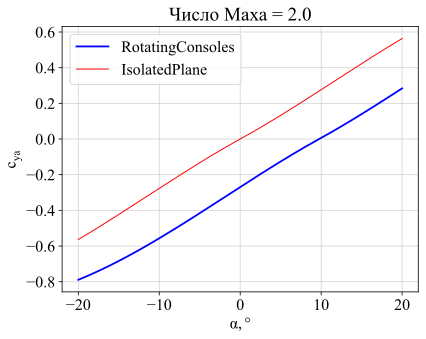

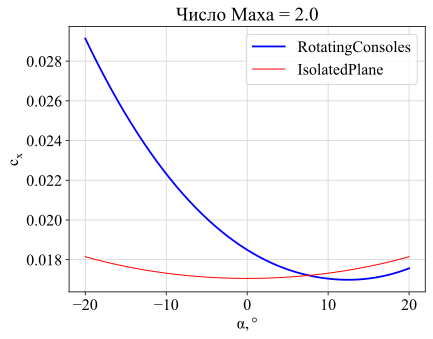

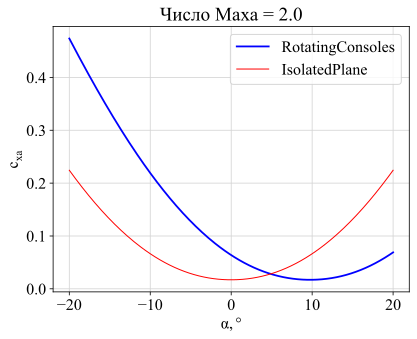

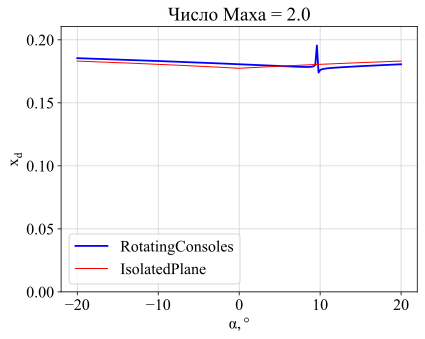

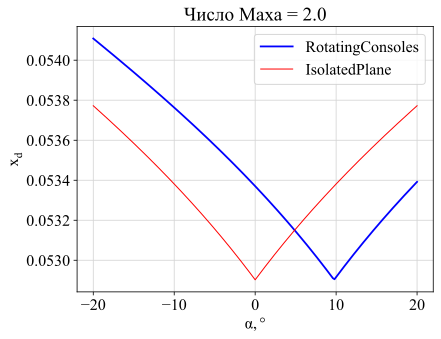

In [12]:
# Нормальная сила
plt.title('Число Маха = 2.0')
plt.plot(alpha_wing, cy_M2_RotConsoles, color = 'blue', lw = 1.8, label = 'RotatingConsoles')
plt.plot(alpha_wing, cy_M2_StatConsoles, color = 'red', lw = 1, label = 'IsolatedPlane')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$c_{y}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
# plt.savefig('plots\M06 c_y.jpeg', facecolor='white')
plt.show()

# Подъемная сила
plt.title('Число Маха = 2.0')
plt.plot(alpha_wing, cya_M2_RotConsoles, color = 'blue', lw = 1.8, label = 'RotatingConsoles')
plt.plot(alpha_wing, cya_M2_StatConsoles, color = 'red', lw = 1, label = 'IsolatedPlane')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$c_{ya}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
# plt.savefig('plots\M06 c_ya.jpeg', facecolor='white')
plt.show()

# Продольная сила
plt.title('Число Маха = 2.0')
plt.plot(alpha_wing, cx_M2_RotConsoles, color = 'blue', lw = 1.8, label = 'RotatingConsoles')
plt.plot(alpha_wing, cx_M2_StatConsoles, color = 'red', lw = 1, label = 'IsolatedPlane')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$c_{x}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
# plt.savefig('plots\M06 c_x.jpeg', facecolor='white')
plt.show()

# Сила лобового сопротивления
plt.title('Число Маха = 2.0')
plt.plot(alpha_wing, cxa_M2_RotConsoles, color = 'blue', lw = 1.8, label = 'RotatingConsoles')
plt.plot(alpha_wing, cxa_M2_StatConsoles, color = 'red', lw = 1, label = 'IsolatedPlane')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$c_{xa}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
# plt.savefig('plots\M06 c_xa.jpeg', facecolor='white')
plt.show()

# Центр давления
plt.title('Число Маха = 2.0')
plt.plot(alpha_wing, xd_M2_RotConsoles, color = 'blue', lw = 1.8, label = 'RotatingConsoles')
plt.plot(alpha_wing, xd_M2_StatConsoles, color = 'red', lw = 1, label = 'IsolatedPlane')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$x_{d}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
plt.ylim(0, np.max(xd_M2_StatConsoles[-1])*1.15)
# plt.savefig('plots\M06 x_d.jpeg', facecolor='white')
plt.show()

# Центр давления
plt.title('Число Маха = 2.0')
plt.plot(alpha_wing, z_dc_M2_RotConsoles, color = 'blue', lw = 1.8, label = 'RotatingConsoles')
plt.plot(alpha_wing, z_dc_M2_StatConsoles, color = 'red', lw = 1, label = 'IsolatedPlane')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$x_{d}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')

# plt.savefig('plots\M06 x_d.jpeg', facecolor='white')
plt.show()